In [5]:
import json
import matplotlib.pyplot as plt

In [6]:
#data_dirs = ['english/scientific']
data_dirs = ['danish','english/legal','english/scientific','french','persian','spanish','vietnamese']

In [7]:
# 统计有多少样本，有多少acronym，long-form
sample_cnt = 0
acronym_cnt = 0
long_form_cnt = 0
sample_num_lst = []
acronym_num_lst = []
long_form_num_lst = []

# 统计有多少样本没有acronym，long-form
acronym_empty_num_lst = []
long_form_empty_num_lst = []
acronym_empty_cnt = 0
long_form_empty_cnt = 0

# 统计句子长度
len_dict = dict()

# 统计acronym长度
acronym_len_dict = dict()

# 统计long-form长度
long_form_len_dict = dict()


for data_dir in data_dirs:
    data_file = data_dir + "/train.json"
    data = json.load(open(data_file))
    
    # sample
    sample_num_lst.append(len(data))
    sample_cnt += len(data)
    
    # acronym and long-form
    tmp_acronym_cnt = 0
    tmp_long_form_cnt = 0
    tmp_acronym_empty_cnt = 0
    tmp_long_form_empty_cnt = 0
    for sample in data:
        if len(sample['text']) not in len_dict:
            len_dict[len(sample['text'])] = 1
        else:
            len_dict[len(sample['text'])] += 1
        
        tmp_acronym_cnt += len(sample['acronyms'])
        tmp_long_form_cnt += len(sample['long-forms'])
        
        if len(sample['acronyms']) == 0:
            tmp_acronym_empty_cnt += 1
        else:
            for acronym in sample['acronyms']:
                if acronym[1]-acronym[0] not in acronym_len_dict:
                    acronym_len_dict[acronym[1]-acronym[0]] = 1
                else:
                    acronym_len_dict[acronym[1]-acronym[0]] += 1
        if len(sample['long-forms']) == 0:
            tmp_long_form_empty_cnt += 1
        else:
            for long_form in sample['long-forms']:
                if long_form[1]-long_form[0] not in long_form_len_dict:
                    long_form_len_dict[long_form[1]-long_form[0]] = 1
                else:
                    long_form_len_dict[long_form[1]-long_form[0]] += 1
                    
    acronym_num_lst.append(tmp_acronym_cnt)
    long_form_num_lst.append(tmp_long_form_cnt)
    acronym_empty_num_lst.append(tmp_acronym_empty_cnt)
    long_form_empty_num_lst.append(tmp_long_form_empty_cnt)   
    
    acronym_cnt += tmp_acronym_cnt
    long_form_cnt += tmp_long_form_cnt
    acronym_empty_cnt += tmp_acronym_empty_cnt
    long_form_empty_cnt += tmp_long_form_empty_cnt
    
    #print(f"{data_file} gets {len(data)} samples.")

print()
print(f"Total num is:{sample_cnt}")
print(sample_num_lst)
print("Ratio is as following: ")
print([round(num/sample_cnt*100,2) for num in sample_num_lst])

print()
print(f"Total acronym num is:{acronym_cnt}")
print(acronym_num_lst)
print("Ratio is as following: ")
print([round(num/acronym_cnt*100,2) for num in acronym_num_lst])

print()
print(f"Total long_form num is:{long_form_cnt}")
print(long_form_num_lst)
print("Ratio is as following: ")
print([round(num/long_form_cnt*100,2) for num in long_form_num_lst])

print()
print(f"Total acronym_empty num is:{acronym_empty_cnt}")
print(acronym_empty_num_lst)
print("Ratio is as following: ")
print([round(num/sample_num_lst[i]*100,2) for i,num in enumerate(acronym_empty_num_lst)])

print()
print(f"Total long_form_empty num is:{long_form_empty_cnt}")
print(long_form_empty_num_lst)
print("Ratio is as following: ")
print([round(num/sample_num_lst[i]*100,2) for i,num in enumerate(long_form_empty_num_lst)])

FileNotFoundError: [Errno 2] No such file or directory: 'english/legal/train.json'

In [4]:
def analyze_dict(d):
    d = dict(sorted(d.items()))
    plt.rcParams['figure.figsize']=(20,12)
    plt.bar(d.keys(),d.values(), width=5)
    lst = []
    for k,v in d.items():
        tmp_lst = [k]*v
        lst.extend(tmp_lst)
    import numpy as np
    len_lst = np.array(lst)
    # 统计分位数
    for percent in [5,15,25,50,75,80,85,90,95,99,100]:
        print(np.percentile(lst, percent))

94.0
139.0
179.0
318.0
488.0
537.0
598.0
682.4000000000015
833.0
1302.0
8324.0


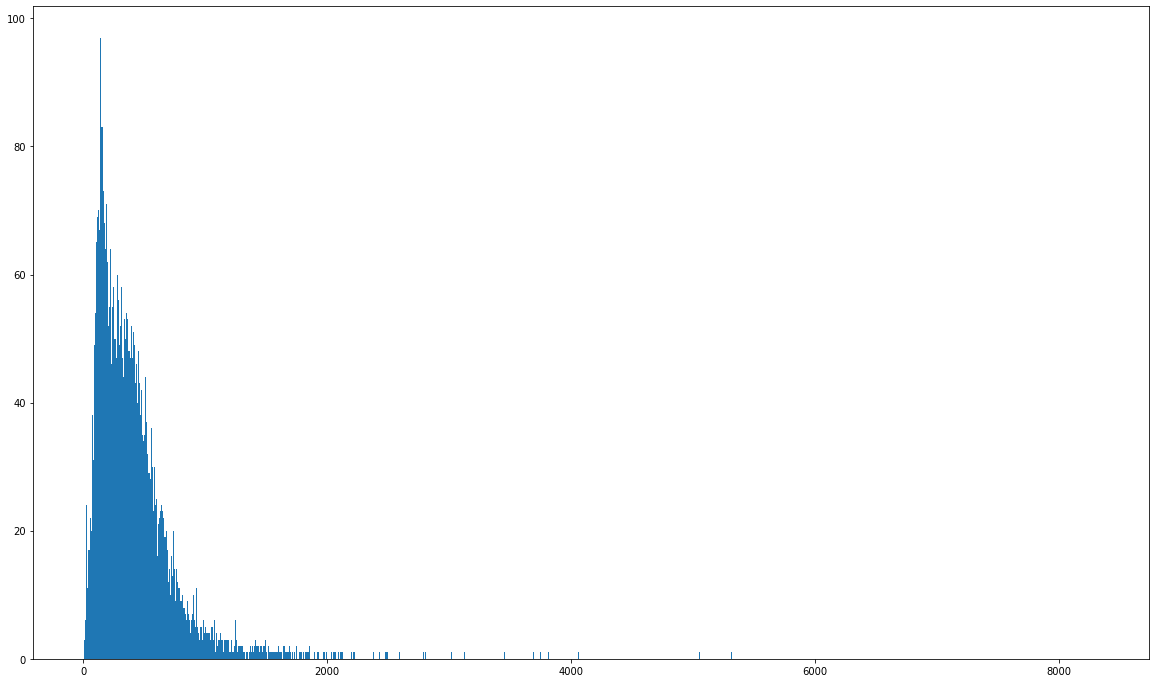

In [5]:
analyze_dict(len_dict)

2.0
3.0
3.0
3.0
5.0
5.0
6.0
6.0
7.0
10.0
174.0


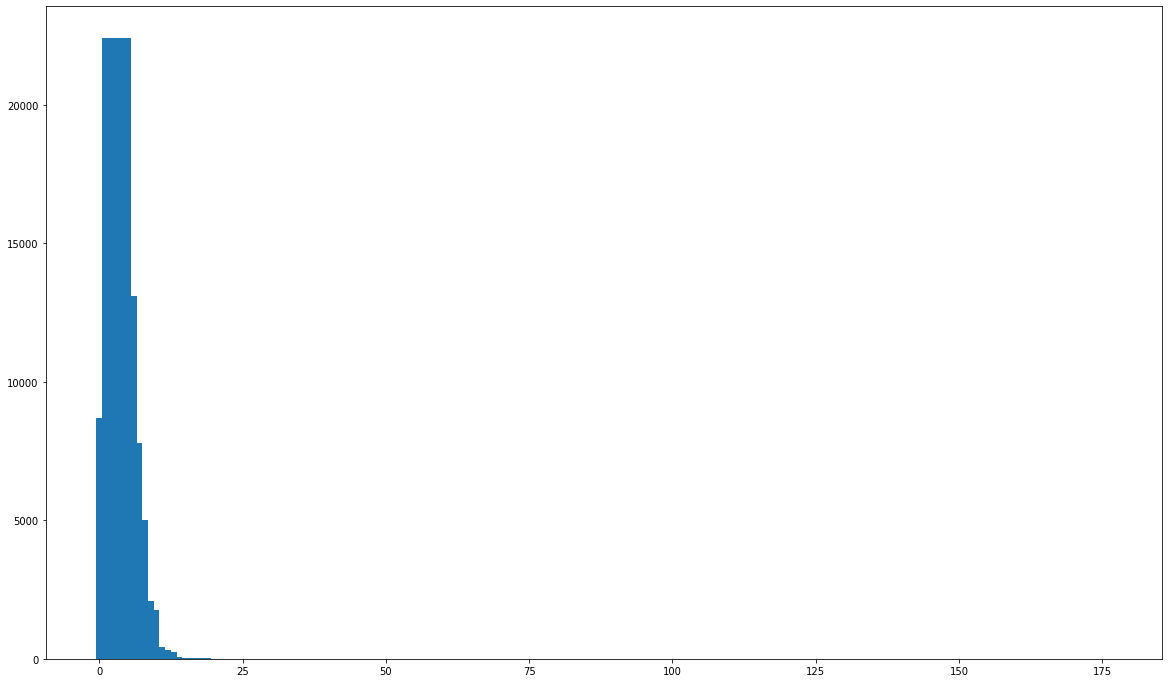

In [6]:
analyze_dict(acronym_len_dict)

10.0
18.0
23.0
34.0
47.0
50.0
54.0
60.0
70.0
86.0
394.0


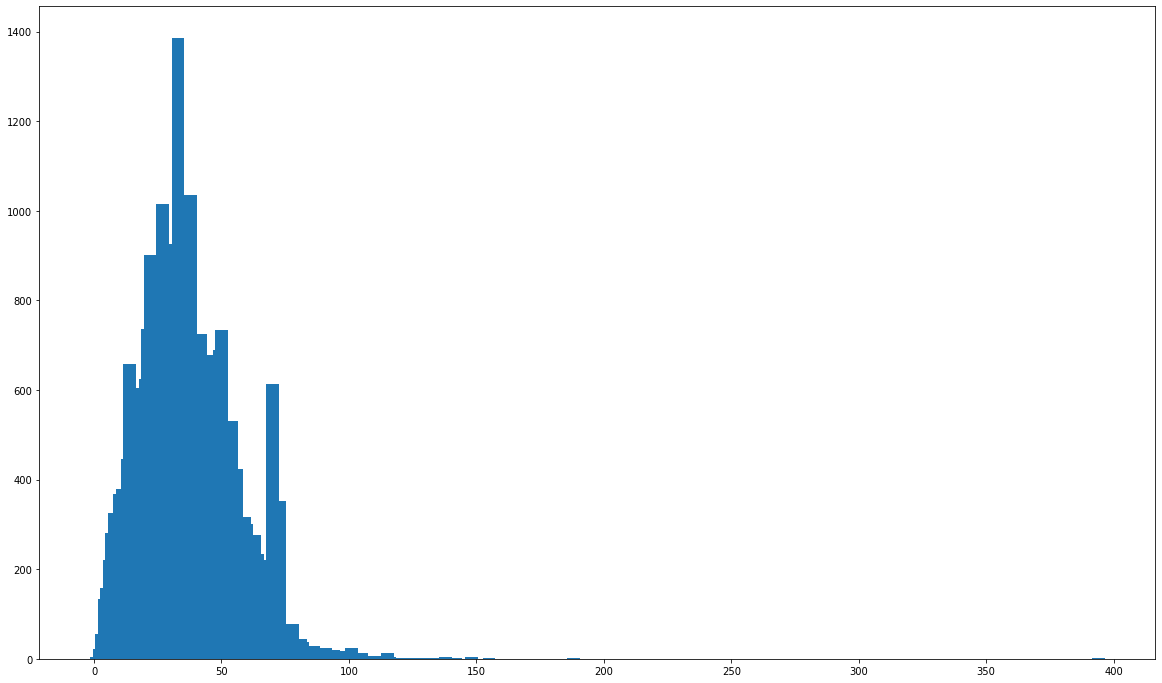

In [7]:
analyze_dict(long_form_len_dict)

In [13]:
# 统计分位数
for percent in [5,15,25,50,75,80,85,90,95,99]:
    print(np.percentile(len_lst, percent))

94.0
139.0
179.0
318.0
488.0
537.0
598.0
682.4000000000015
833.0
1302.0
